In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [2]:
df=pd.read_csv('./pima-indians-diabetes.csv')

In [3]:
df

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]


In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
(df == 0).sum()  


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
df.shape

(767, 9)

In [11]:
hidden_missing = ["Glucose", "BloodPressure", "SkinThickness", "BMI"]
df[hidden_missing]=df[hidden_missing].replace(0,np.nan)

In [12]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85.0,66.0,29.0,0,26.6,0.351,31,0
1,8,183.0,64.0,NaN,0,23.3,0.672,32,1
2,1,89.0,66.0,23.0,94,28.1,0.167,21,0
3,0,137.0,40.0,35.0,168,43.1,2.288,33,1
4,5,116.0,74.0,NaN,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101.0,76.0,48.0,180,32.9,0.171,63,0
763,2,122.0,70.0,27.0,0,36.8,0.340,27,0
764,5,121.0,72.0,23.0,112,26.2,0.245,30,0
765,1,126.0,60.0,NaN,0,30.1,0.349,47,1


In [13]:
fill_missing_value = ["Glucose", "BloodPressure", "BMI"]
for col in fill_missing_value:
    median_val=df[col].median()
    df[col]=df[col].replace(0, np.nan).fillna(median_val)


In [14]:
# STEP 3 — Impute یا حذف مقادیر صفر/گمشده

df_clean = df.copy()

# ستون‌هایی با Missing خیلی زیاد → فیچر جدید Missing Indicator
for col in ["SkinThickness", "Insulin"]:
    df_clean[col + "_missing"] = (df_clean[col] == 0).astype(int)
    df_clean[col] = df_clean[col].replace(0, np.nan)



In [15]:
median_skin = df_clean["SkinThickness"].replace(0, np.nan).median()
df_clean["SkinThickness"] = df_clean["SkinThickness"].replace(0, np.nan).fillna(median_skin)

# df_clean.drop(columns=['Insulin'],inplace=True)
# خلاصه‌ی داده تمیز شده
print(df_clean.isna().sum())




Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     373
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
SkinThickness_missing         0
Insulin_missing               0
dtype: int64


In [16]:
df_clean.drop(columns=['Insulin'],inplace=True)

In [17]:
df_clean.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_missing,Insulin_missing
0,1,85.0,66.0,29.0,26.6,0.351,31,0,0,1
1,8,183.0,64.0,29.0,23.3,0.672,32,1,0,1
2,1,89.0,66.0,23.0,28.1,0.167,21,0,0,0
3,0,137.0,40.0,35.0,43.1,2.288,33,1,0,0
4,5,116.0,74.0,29.0,25.6,0.201,30,0,0,1
5,3,78.0,50.0,32.0,31.0,0.248,26,1,0,0
6,10,115.0,72.0,29.0,35.3,0.134,29,0,0,1
7,2,197.0,70.0,45.0,30.5,0.158,53,1,0,0
8,8,125.0,96.0,29.0,32.3,0.232,54,1,0,1
9,4,110.0,92.0,29.0,37.6,0.191,30,0,0,1


In [18]:
# STEP 4 — Feature Engineering

df_feat = df_clean.copy()

# Glucose categories (طبق ADA guidelines)
def glucose_cat(x):
    if x < 100: 
        return "Normal"
    elif x < 126: 
        return "Pre-diabetes"
    else: 
        return "Diabetes"
df_feat["Glucose_category"] = df_feat["Glucose"].apply(glucose_cat)

# BMI categories (WHO)
def bmi_cat(x):
    if x < 25:
        return "Normal"
    elif x < 30:
        return "Overweight"
    else:
        return "Obese"
df_feat["BMI_category"] = df_feat["BMI"].apply(bmi_cat)

# Age bins
def age_bin(x):
    if x < 30:
        return "Young"
    elif x < 50:
        return "Middle-aged"
    else:
        return "Older"
df_feat["Age_bins"] = df_feat["Age"].apply(age_bin)

# خلاصه دسته‌ها
print("Glucose categories:", df_feat["Glucose_category"].value_counts())
print("\nBMI categories:", df_feat["BMI_category"].value_counts())
print("\nAge bins:", df_feat["Age_bins"].value_counts())

df_feat.head()


Glucose categories: Glucose_category
Diabetes        296
Pre-diabetes    279
Normal          192
Name: count, dtype: int64

BMI categories: BMI_category
Obese         482
Overweight    179
Normal        106
Name: count, dtype: int64

Age bins: Age_bins
Young          396
Middle-aged    283
Older           88
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_missing,Insulin_missing,Glucose_category,BMI_category,Age_bins
0,1,85.0,66.0,29.0,26.6,0.351,31,0,0,1,Normal,Overweight,Middle-aged
1,8,183.0,64.0,29.0,23.3,0.672,32,1,0,1,Diabetes,Normal,Middle-aged
2,1,89.0,66.0,23.0,28.1,0.167,21,0,0,0,Normal,Overweight,Young
3,0,137.0,40.0,35.0,43.1,2.288,33,1,0,0,Diabetes,Obese,Middle-aged
4,5,116.0,74.0,29.0,25.6,0.201,30,0,0,1,Pre-diabetes,Overweight,Middle-aged


In [19]:
# STEP 5 — One-Hot Encoding for categorical features

df_model = pd.get_dummies(
    df_feat,
    columns=["Glucose_category", "BMI_category", "Age_bins"],
    drop_first=True   # برای جلوگیری از multicollinearity
)

print("Final shape:", df_model.shape)
df_model.head()


Final shape: (767, 16)


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_missing,Insulin_missing,Glucose_category_Normal,Glucose_category_Pre-diabetes,BMI_category_Obese,BMI_category_Overweight,Age_bins_Older,Age_bins_Young
0,1,85.0,66.0,29.0,26.6,0.351,31,0,0,1,True,False,False,True,False,False
1,8,183.0,64.0,29.0,23.3,0.672,32,1,0,1,False,False,False,False,False,False
2,1,89.0,66.0,23.0,28.1,0.167,21,0,0,0,True,False,False,True,False,True
3,0,137.0,40.0,35.0,43.1,2.288,33,1,0,0,False,False,True,False,False,False
4,5,116.0,74.0,29.0,25.6,0.201,30,0,0,1,False,True,False,True,False,False


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# جدا کردن X و y
X = df_model.drop(columns=["Outcome"])
y = df_model["Outcome"]

# تقسیم داده
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scaling فقط برای مدل‌های خطی
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# آموزش مدل Logistic Regression
logreg = LogisticRegression(max_iter=500, random_state=42)
logreg.fit(X_train_scaled, y_train)

# پیش‌بینی
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:,1]

# نتایج
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))




Confusion Matrix:
 [[82 18]
 [28 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.59      0.48      0.53        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154

ROC-AUC: 0.8096296296296297


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_threshold(threshold):
    y_pred_thresh = (y_prob >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    return cm, prec, rec, f1

print("Threshold = 0.5")
cm, prec, rec, f1 = evaluate_threshold(0.5)
print("Confusion Matrix:\n", cm)
print(f"Precision={prec:.3f}, Recall={rec:.3f}, F1={f1:.3f}\n")

print("Threshold = 0.3")
cm, prec, rec, f1 = evaluate_threshold(0.3)
print("Confusion Matrix:\n", cm)
print(f"Precision={prec:.3f}, Recall={rec:.3f}, F1={f1:.3f}")


Threshold = 0.5
Confusion Matrix:
 [[82 18]
 [28 26]]
Precision=0.591, Recall=0.481, F1=0.531

Threshold = 0.3
Confusion Matrix:
 [[71 29]
 [14 40]]
Precision=0.580, Recall=0.741, F1=0.650


In [22]:
from sklearn.ensemble import RandomForestClassifier

# آموزش مدل
rf = RandomForestClassifier(
    n_estimators=200,      # تعداد درخت‌ها
    max_depth=None,        # اجازه عمق نامحدود
    random_state=42,
    class_weight="balanced"   # برای جبران عدم توازن کلاس‌ها
)
rf.fit(X_train, y_train)

# پیش‌بینی
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# ارزیابی با Threshold=0.5
print("Threshold = 0.5")
cm = confusion_matrix(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)
print(f"Precision={prec:.3f}, Recall={rec:.3f}, F1={f1:.3f}")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

# ارزیابی با Threshold=0.3
print("\nThreshold = 0.3")
y_pred_rf_thresh = (y_prob_rf >= 0.3).astype(int)
cm = confusion_matrix(y_test, y_pred_rf_thresh)
prec = precision_score(y_test, y_pred_rf_thresh)
rec = recall_score(y_test, y_pred_rf_thresh)
f1 = f1_score(y_test, y_pred_rf_thresh)
print("Confusion Matrix:\n", cm)
print(f"Precision={prec:.3f}, Recall={rec:.3f}, F1={f1:.3f}")


Threshold = 0.5
Confusion Matrix:
 [[80 20]
 [23 31]]
Precision=0.608, Recall=0.574, F1=0.590
ROC-AUC: 0.7963888888888888

Threshold = 0.3
Confusion Matrix:
 [[71 29]
 [13 41]]
Precision=0.586, Recall=0.759, F1=0.661


In [23]:
import numpy as np
import pandas as pd

# ضرایب مدل
coef = logreg.coef_[0]
features = X_train.columns

# ساخت جدول Odds Ratios
odds_ratios = pd.DataFrame({
    "Feature": features,
    "Coefficient": coef,
    "OddsRatio": np.exp(coef)
}).sort_values(by="OddsRatio", ascending=False)

print(odds_ratios.head(10))


                          Feature  Coefficient  OddsRatio
1                         Glucose     1.201189   3.324066
11             BMI_category_Obese     0.652932   1.921166
4                             BMI     0.436130   1.546709
12        BMI_category_Overweight     0.399957   1.491761
0                     Pregnancies     0.399409   1.490943
5        DiabetesPedigreeFunction     0.272318   1.313005
8                 Insulin_missing     0.236138   1.266349
10  Glucose_category_Pre-diabetes     0.127632   1.136135
3                   SkinThickness     0.005634   1.005649
7           SkinThickness_missing     0.000000   1.000000


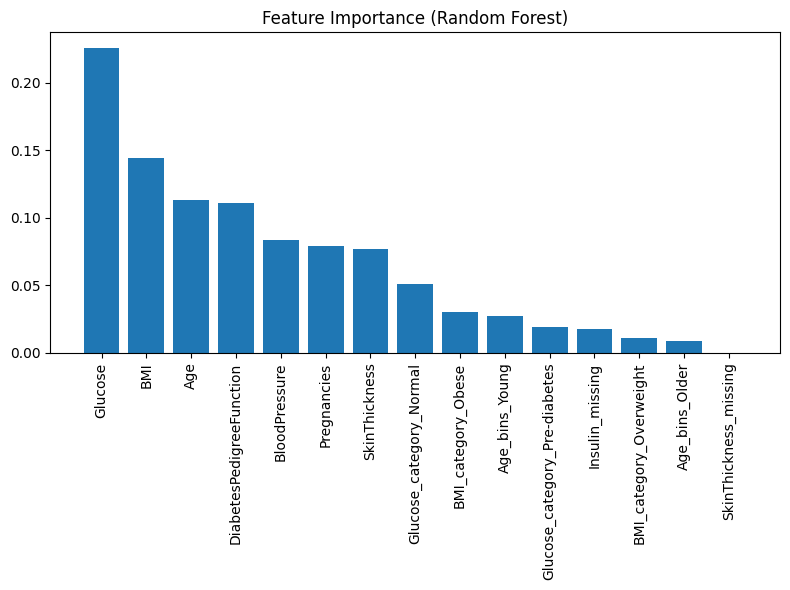

In [24]:
import matplotlib.pyplot as plt

# اهمیت ویژگی‌ها
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


C:\Users\yazdan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


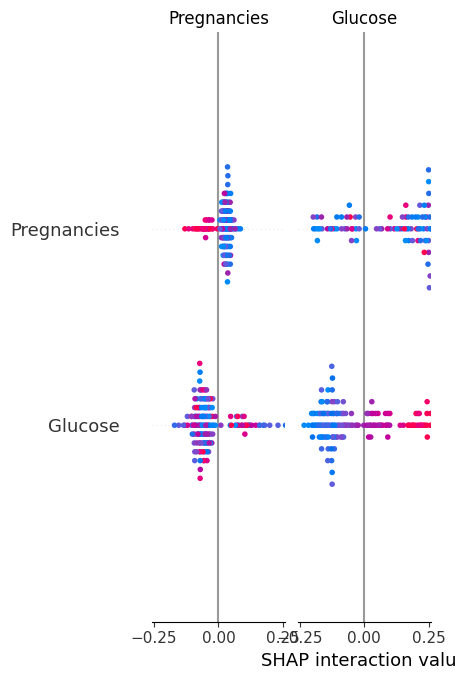

In [25]:
import shap

# فرض می‌کنیم مدل RandomForest رو با نام rf_model آموزش دادی
# و داده‌های X_train, X_test آماده هستن

explainer = shap.TreeExplainer(rf)

shap_values = explainer(X_test)

shap.summary_plot(shap_values.values, X_test, feature_names=X_test.columns)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

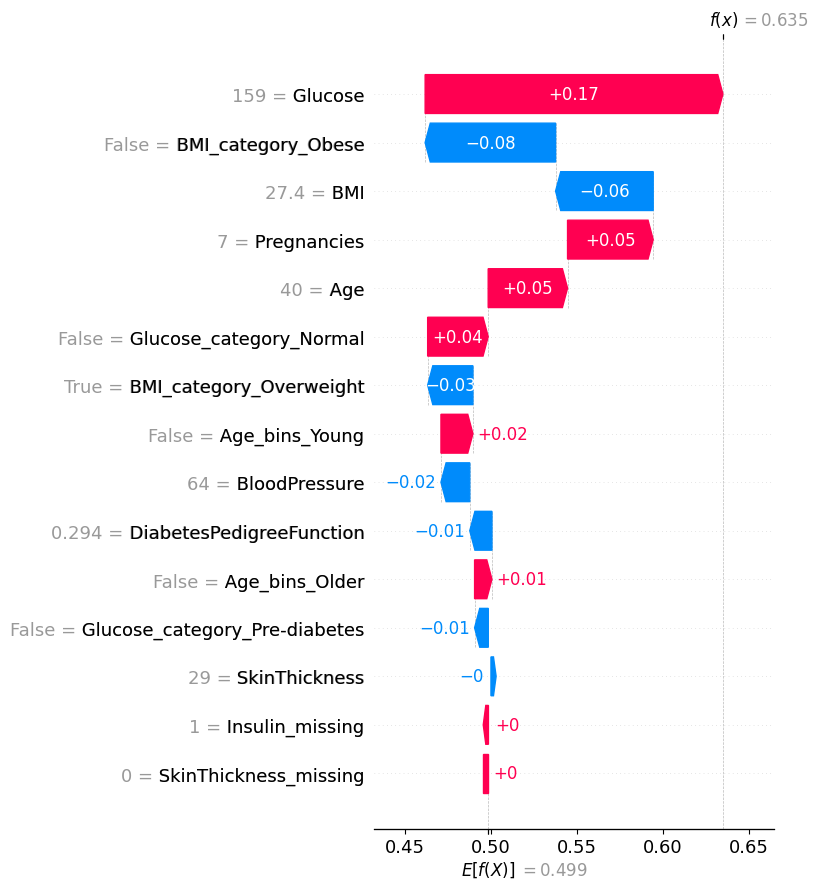

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

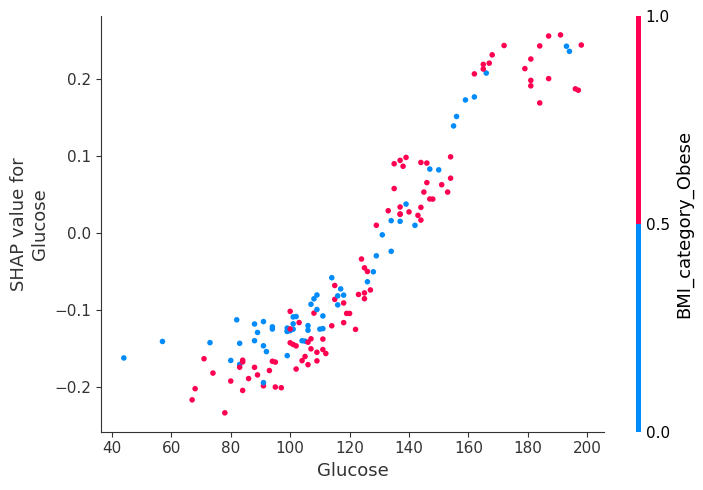

<Figure size 640x480 with 0 Axes>

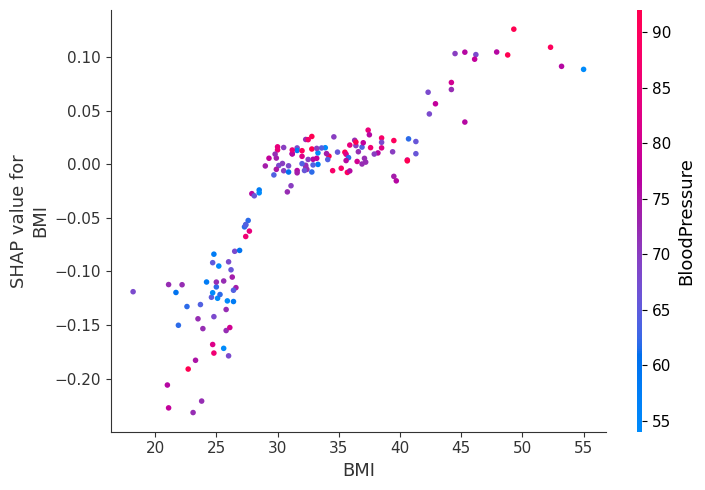

<Figure size 640x480 with 0 Axes>

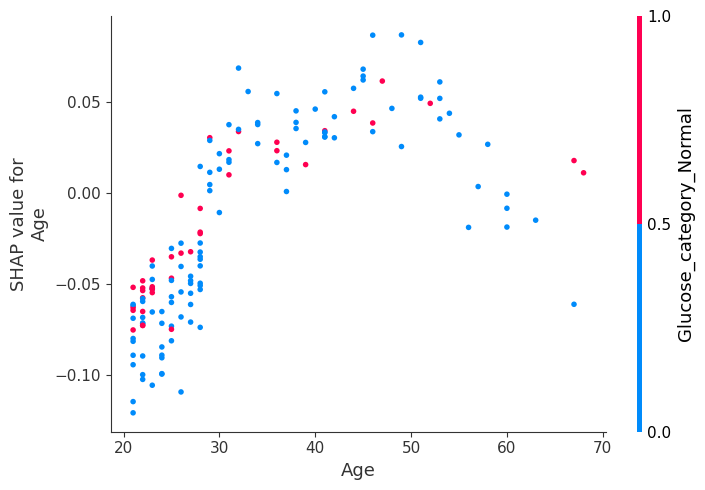

<Figure size 640x480 with 0 Axes>

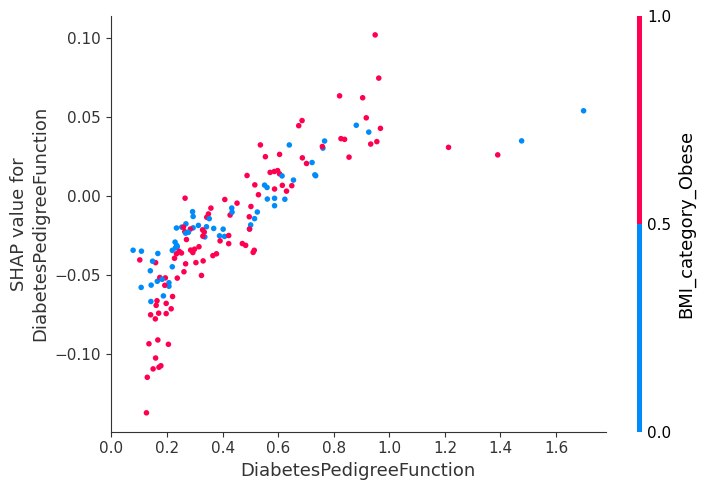

<Figure size 640x480 with 0 Axes>

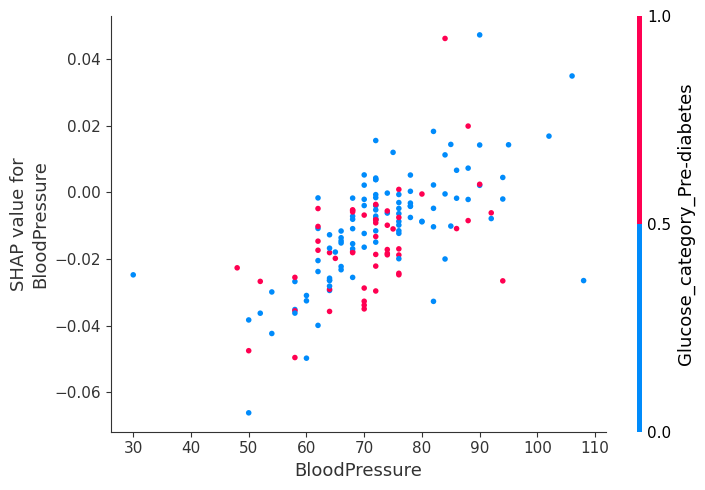

In [38]:
features = X_test.columns

# 4-1) Summary (Beeswarm)
plt.figure()
shap.summary_plot(shap_values.values, X_test, feature_names=features, show=False)
plt.tight_layout()
plt.savefig("figures/shap_summary_rf.png", dpi=200, bbox_inches="tight")
plt.close()
# plt.show()


# 4-2) انتخاب خودکار 5 فیچر برتر از روی اهمیت مدل برای dependence plot
import numpy as np
imp_idx = np.argsort(rf.feature_importances_)[::-1][:5]
top_feats = [features[i] for i in imp_idx]

for f in top_feats:
    plt.figure()
    shap.dependence_plot(f, shap_values.values[:, :, 1], X_test, feature_names=features, show=False)
    plt.tight_layout()
    plt.savefig(f"figures/shap_dependence_{f}.png", dpi=200, bbox_inches="tight")
    # plt.close()
    plt.show()

# 4-3) Force یا Waterfall برای یک کیس (توصیه: Waterfall پایدارتر است برای ذخیره)
i = 0  # نمونه اول تست
# ساخت شیء Explanation برای waterfall
# Select SHAP values for the positive class (index 1)
single_shap_values = shap_values.values[i, :, 1]
single_base_value = shap_values.base_values[i, 1]

exp = shap.Explanation(
    values=single_shap_values,
    base_values=single_base_value,
    data=X_test.iloc[i, :].values,
    feature_names=features
)

plt.figure()
shap.plots.waterfall(exp, max_display=15, show=False)
plt.tight_layout()
# plt.savefig("figures/shap_waterfall_rf_case0.png", dpi=200, bbox_inches="tight")
# plt.close()
# plt.show()

# print("Saved:",
#       "\n- figures/shap_summary_rf.png",
#       *[f"- figures/shap_dependence_{f}.png" for f in top_feats],
#       "\n- figures/shap_waterfall_rf_case0.png",
#      )


Brier Score: 0.17982987012987015


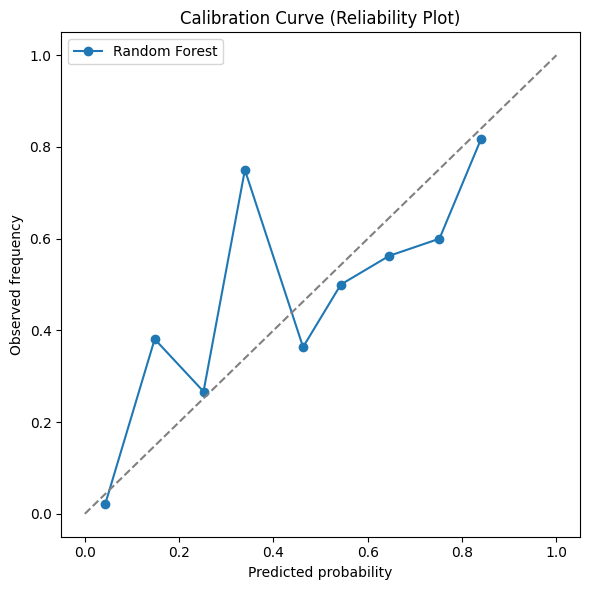

In [40]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

# انتخاب مدل: می‌تونی logreg یا rf رو بذاری
probs = y_prob_rf   # ← خروجی predict_proba برای RF
brier = brier_score_loss(y_test, probs)
print("Brier Score:", brier)

# ساخت calibration curve
prob_true, prob_pred = calibration_curve(y_test, probs, n_bins=10)

plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, marker='o', label="Random Forest")
plt.plot([0,1],[0,1],'--', color="gray")
plt.xlabel("Predicted probability")
plt.ylabel("Observed frequency")
plt.title("Calibration Curve (Reliability Plot)")
plt.legend()
plt.tight_layout()
plt.savefig("figures/calibration_rf.png", dpi=200)
plt.show()


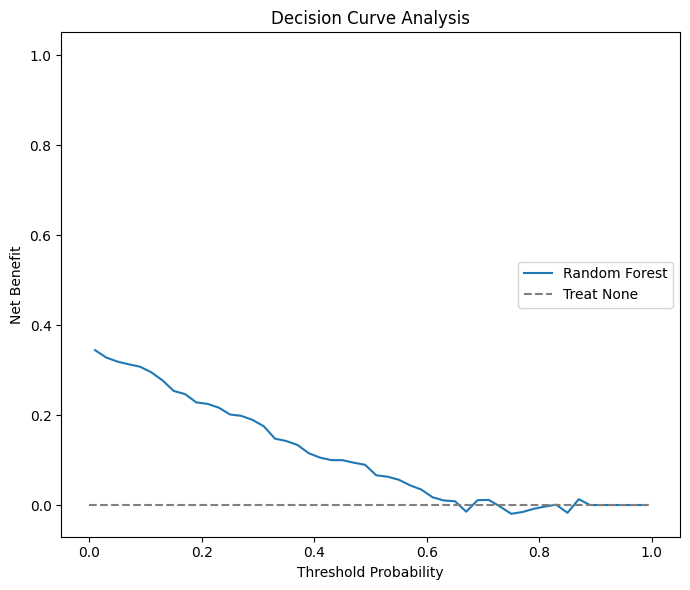

In [41]:
def decision_curve_analysis(y_true, y_prob, thresholds=np.linspace(0.01, 0.99, 50)):
    n = len(y_true)
    results = []
    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        TP = ((y_pred==1) & (y_true==1)).sum()
        FP = ((y_pred==1) & (y_true==0)).sum()
        # Net Benefit فرمول کلاسیک Vickers 2006
        NB = (TP/n) - (FP/n) * (t/(1-t))
        results.append([t, NB])
    return pd.DataFrame(results, columns=["Threshold","NetBenefit"])

# اجرا برای RF
dca_rf = decision_curve_analysis(y_test, y_prob_rf)

plt.figure(figsize=(7,6))
plt.plot(dca_rf["Threshold"], dca_rf["NetBenefit"], label="Random Forest")
plt.plot([0,1],[0,0],'--',color="gray",label="Treat None")
plt.plot([0,1],[1,1],'',alpha=0)  # برای یکدست بودن محور
plt.xlabel("Threshold Probability")
plt.ylabel("Net Benefit")
plt.title("Decision Curve Analysis")
plt.legend()
plt.tight_layout()
plt.savefig("figures/dca_rf.png", dpi=200)
plt.show()


In [43]:
# داخل notebook
import joblib

# فرض: اسم شیء نهایی تو 'pipeline' یا 'model' است (هر کدام داری)
joblib.dump(rf, "model.pkl")  # یا joblib.dump(model, "model.pkl")
print("Saved to model.pkl")


Saved to model.pkl


In [45]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,SkinThickness_missing,Insulin_missing,Glucose_category_Normal,Glucose_category_Pre-diabetes,BMI_category_Obese,BMI_category_Overweight,Age_bins_Older,Age_bins_Young
43,7,159.0,64.0,29.0,27.4,0.294,40,0,1,False,False,False,True,False,False
671,10,68.0,106.0,23.0,35.5,0.285,47,0,0,True,False,True,False,False,False
699,2,122.0,76.0,27.0,35.9,0.483,26,0,0,False,True,True,False,False,True
426,1,181.0,64.0,30.0,34.1,0.328,38,0,0,False,False,True,False,False,False
80,2,74.0,72.0,29.0,32.3,0.102,22,0,1,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,3,88.0,58.0,11.0,24.8,0.267,22,0,0,True,False,False,False,False,True
636,2,94.0,76.0,18.0,31.6,0.649,23,0,0,True,False,True,False,False,True
592,2,82.0,52.0,22.0,28.5,1.699,25,0,0,True,False,False,True,False,True
311,2,155.0,74.0,17.0,26.6,0.433,27,0,0,False,False,False,True,False,True
